In [1]:
! echo $WARMABS_DATA

/projects/9c9e0cc1-def7-4c92-95b3-ccd584cf52f3/warmabs22


In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import xspec
import astropy.io.fits as fits

#xspec.AllModels.initpackage("xstarmod","lmodel_warmabs.dat",'/projects/9c9e0cc1-def7-4c92-95b3-ccd584cf52f3/warmabs22/')
xspec.AllModels.lmod("xstarmod",dirPath='/projects/9c9e0cc1-def7-4c92-95b3-ccd584cf52f3/warmabs22/')

#xspec.AllModels.lmod("xstarmod",dirPath='/projects/9c9e0cc1-def7-4c92-95b3-ccd584cf52f3/warmabs22/')
#! echo $WARMABS_DATA

In [199]:
#defining the model
xspec.AllData.clear() 
xspec.AllModels.clear()
#purple
#m1 = xspec.Model("eplogpar*gabs*gabs*gabs*phabs")
#m1.setPars(1, 1, 7e-3, 0.4649, 3e-4, 3e-4, 6.404, 6.5e-3, 9e-3, 6.391, 6.5e-3, 9e-3, 0.007)

#m1 = xspec.Model("eplogpar*edge*edge*phabs")
#m1.setPars(1, 1, 7e-3, 6.391, .5, 6.404, .5, 0.007)

m1 = xspec.Model("eplogpar*hotabs*phabs")
m1.setPars(1, 1, 7e-3, np.log10(1.7e19/1e22), np.log10(1.5e6/1e4), 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, .433, 4.234e-9)


#red
#m1 = xspec.Model("eplogpar*gabs*gabs*phabs") 
#m1.setPars(1, 1e-3, 7, 0.40058, 3e-4, 2.2e-4, 0.4649, 3e-4, 3e-4, 0.007)

#black
#m1 = xspec.Model("eplogpar*gabs*gabs*phabs") 
#m1.setPars(1, 1e-3, 7, 0.40058, 3e-4, 2.2e-4, 0.4649, 3e-4, 3e-4, 0.007)

In [200]:
#XMM RGS
fs=xspec.FakeitSettings(response='R1o1.rmf',exposure=1.85e6,fileName='rgs1_pyxspec.pha')
fs2=xspec.FakeitSettings(response='R2o1.rmf',exposure=1.85e6,fileName='rgs2_pyxspec.pha')

#X-IFU Athena
fs3=xspec.FakeitSettings(response='XIFU_CC_BASELINECONF_IMPROVED_SPECTRAL_RESOLUTION_2018_10_10.rmf',arf='XIFU_CC_BASELINECONF_IMPROVED_SPECTRAL_RESOLUTION_2018_10_10.arf',exposure=1.85e6,fileName='xifu_pyxspec.pha')

#Colibri
fs4=xspec.FakeitSettings(response='colibri20190313.rmf',arf='colibrionaxis20190313.arf',exposure=300e3,fileName='col_pyxspec.pha')

#generating fake data 
#fs=xspec.FakeitSettings(response='colibri20190313.rmf',arf='colibrionaxis20190313.arf',exposure=1.85e6/2000*60,fileName='test_pyxspec.pha') #purple

#fs=xspec.FakeitSettings(response='colibri20190111.rmf', arf='colibrionaxis20190213.arf',exposure='1.85e6',fileName='test_pyxspec.pha') #red

#fs=xspec.FakeitSettings(response='colibri20190111.rmf', arf='colibrionaxis20190123.arf',exposure='1.85e6',fileName='test_pyxspec.pha') #black

#xspec.AllData.fakeit(2, [fs, fs2], applyStats=True)

#xspec.AllData.fakeit(1, fs)

xspec.AllData.fakeit(2, [fs,fs2], applyStats=False)

In [213]:
#printing out parameters
for i in range(1,m1.nParameters+1):
    p=m1(i)
    print('%s %g +/- %g [%s]' % (p.name,p.values[0],p.sigma,p.unit))

Ep 1 +/- 0 [keV]
beta 1 +/- 0 []
norm 0.007 +/- 0 []
column -2.76955 +/- 0 [cm^-2]
logt4 2.17609 +/- 0 []
Cabund 0 +/- 0 []
Nabund 0 +/- 0 []
Oabund 0 +/- 0 []
Fabund 0 +/- 0 []
Neabund 0 +/- 0 []
Naabund 0 +/- 0 []
Mgabund 0 +/- 0 []
Alabund 0 +/- 0 []
Siabund 1 +/- 0 []
Pabund 0 +/- 0 []
Sabund 0 +/- 0 []
Clabund 0 +/- 0 []
Arabund 0 +/- 0 []
Kabund 0 +/- 0 []
Caabund 0 +/- 0 []
Scabund 0 +/- 0 []
Tiabund 0 +/- 0 []
Vabund 0 +/- 0 []
Crabund 0 +/- 0 []
Mnabund 0 +/- 0 []
Feabund 0 +/- 0 []
Coabund 0 +/- 0 []
Niabund 0 +/- 0 []
Cuabund 0 +/- 0 []
Znabund 0 +/- 0 []
write_outfile 0 +/- 0 []
outfile_idx 0 +/- 0 []
vturb 0 +/- 0 [km/s]
Redshift 0.433 +/- 0 []
nH 4.234e-09 +/- 0 [10^22]


In [33]:
xspec.Fit.statMethod = 'cstat'
# xspec.Fit.statMethod = 'chi2'
xspec.Fit.perform()


In [61]:
#printing out parameters
for i in range(1,m1.nParameters+1):
    p=m1(i)
    print('%s %g +/- %g [%s]' % (p.name,p.values[0],p.sigma,p.unit))

Ep 1 +/- 0 [keV]
beta 1 +/- 0 []
norm 0.007 +/- 0 []
column -2.76955 +/- 0 [cm^-2]
logt4 2.30103 +/- 0 []
Cabund 0 +/- 0 []
Nabund 0 +/- 0 []
Oabund 1 +/- 0 []
Fabund 0 +/- 0 []
Neabund 0 +/- 0 []
Naabund 0 +/- 0 []
Mgabund 0 +/- 0 []
Alabund 0 +/- 0 []
Siabund 0 +/- 0 []
Pabund 0 +/- 0 []
Sabund 0 +/- 0 []
Clabund 0 +/- 0 []
Arabund 0 +/- 0 []
Kabund 0 +/- 0 []
Caabund 0 +/- 0 []
Scabund 0 +/- 0 []
Tiabund 0 +/- 0 []
Vabund 0 +/- 0 []
Crabund 0 +/- 0 []
Mnabund 0 +/- 0 []
Feabund 0 +/- 0 []
Coabund 0 +/- 0 []
Niabund 0 +/- 0 []
Cuabund 0 +/- 0 []
Znabund 0 +/- 0 []
write_outfile 0 +/- 0 []
outfile_idx 0 +/- 0 []
vturb 0 +/- 0 [km/s]
Redshift 0.433 +/- 0 []
nH 4.234e-09 +/- 0 [10^22]


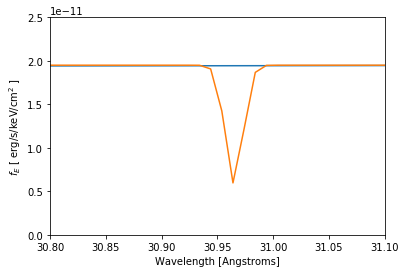

(0, 2.5e-11)

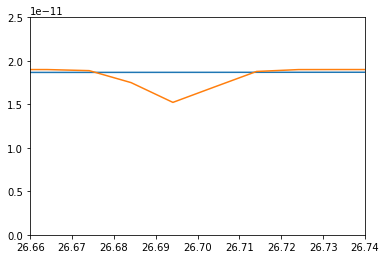

In [201]:
#plotting XMM
xspec.Plot.xAxis = 'keV'
xspec.Plot.setRebin(minSig=0, maxBins=1)
xspec.Plot("eufspec")
plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('$f_E$ [ erg/s/keV/cm$^2$ ]')
plt.xlim(8,33)
plt.ylim(0,2.5e-11)
#plt.plot(xspec.Plot.x(1), xspec.Plot.y(1), '.')
#plt.plot(xspec.Plot.x(1), xspec.Plot.model())
#plt.errorbar(12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.y(1))*1.6e-9,yerr=np.array(xspec.Plot.yErr(1))*1.6e-9,fmt='.')
#plt.errorbar(12.398/np.array(xspec.Plot.x(2)), np.array(xspec.Plot.y(2))*1.6e-9,yerr=np.array(xspec.Plot.yErr(2))*1.6e-9,fmt='.')
plt.plot(12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.model())*1.6e-9)
xx=12.398/np.array(xspec.Plot.x(1))
plt.plot(xx,1.95e-11*(1-0.7*np.exp(-(xx-30.965)**2/2/(0.008)**2)))
plt.xlim(30.8,31.1)
# plt.yscale('log')
plt.show()
plt.plot(12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.model())*1.6e-9)
plt.plot(xx,1.9e-11*(1-0.2*np.exp(-(xx-26.695)**2/2/(0.008)**2)))

plt.xlim(26.66,26.74)
plt.ylim(0,2.5e-11)
# plt.yscale('log')

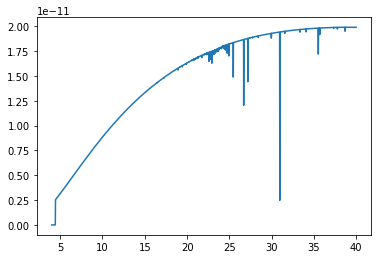

In [87]:
plt.plot(12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.model())*1.6e-9)
#plt.xlim(20,33)

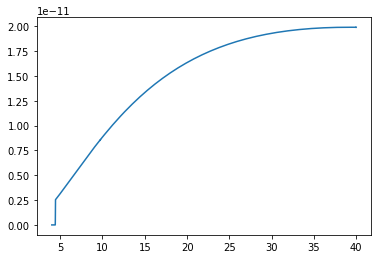

In [212]:
plt.plot(12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.model())*1.6e-9)
#plt.xlim(9,11)

Exception: Error: Unable to retrieve requested plot array

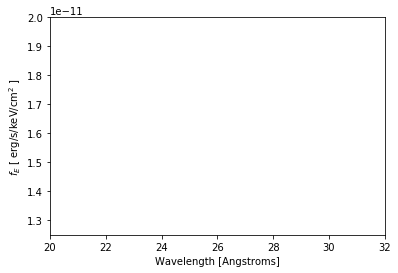

In [116]:
#plotting Athena
xspec.Plot.xAxis = 'keV'
xspec.Plot.setRebin(minSig=0, maxBins=1)
xspec.Plot("eufspec")
plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('$f_E$ [ erg/s/keV/cm$^2$ ]')
#plt.xlim(40,45)            #abnormality
#plt.ylim(1.5e-11,1.7e-11)  #abnormality
#plt.ylim(1e-14,1e-12)
#plt.ylim(1e-11,2e-11)     #oxygen lines
#plt.xlim(30,32)
#plt.ylim(1e-14,8e-13)     #iron lines
#plt.xlim(1.88,2)
#plt.xlim(0,10)
#plt.ylim(1e-13,1e-12)
#plt.ylim(1.8e-11,2e-11)
#plt.xlim(29.239,29.304)
plt.xlim(20,32)
plt.ylim(1.25e-11,2e-11)
plt.errorbar(12.398/np.array(xspec.Plot.x(3)), np.array(xspec.Plot.y(3))*1.6e-9,yerr=np.array(xspec.Plot.yErr(3))*1.6e-9,fmt='.',zorder=1)
plt.plot(12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.model())*1.6e-9, zorder=2,color='orange')
#plt.yscale('log')

(20, 32)

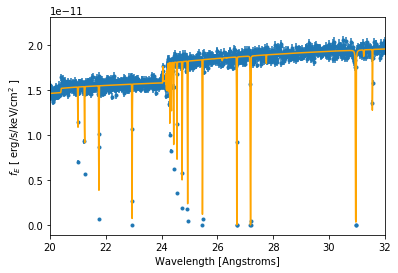

In [192]:
#plotting Colibri
xspec.Plot.xAxis = 'keV'
xspec.Plot.setRebin(minSig=0, maxBins=1)
xspec.Plot("eufspec")
plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('$f_E$ [ erg/s/keV/cm$^2$ ]')
plt.errorbar(12.398/np.array(xspec.Plot.x(4)), np.array(xspec.Plot.y(4))*1.6e-9,yerr=np.array(xspec.Plot.yErr(4))*1.6e-9,fmt='.',zorder=1)
plt.plot(12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.model())*1.6e-9, zorder=2,color='orange')
plt.xlim(20,32)
#plt.xlim(30.94365,30.96425) #plt.ylim(1.8e-11,2e-11)

In [24]:
xspec.Fit.show()

In [120]:
#calculating flux
xspec.AllModels.calcFlux("0.39982005 0.401113547")
s1 = xspec.AllData(1)
I = s1.flux
delta_e = 0.39982005-0.401113547

xspec.AllModels.calcFlux("0.39972005 0.39982005")
s1 = xspec.AllData(1)
fl = s1.flux

xspec.AllModels.calcFlux("0.401013547 0.401113547")
s1 = xspec.AllData(1)
fr = s1.flux

F = (fl[3] + fr[3])/2e-4

ew = delta_e - (I[3]/F)
print(I[3])
print(fl[3])
print(fr[3])
print(ew)
print(F)
print(2*ew/(0.400677352+0.400777352)*30.95)   #in angstroms


#xspec.AllModels.eqwidth("1:2",rangeFrac=0.4006,err=True,number=5,level=1)
#s1.eqwidth


2.5851839046366592e-05
2.9972599347407953e-06
2.9713045590196774e-06
-0.0021597635561675012
0.029842822468802363
-0.16680838412892807


In [131]:
#calculating flux
xspec.AllModels.calcFlux("0.46409956 0.464795492")
s1 = xspec.AllData(1)
I = s1.flux
delta_e = 0.464795492-0.46409956

xspec.AllModels.calcFlux("0.46409956 0.46509956")
s1 = xspec.AllData(1)
fl = s1.flux

xspec.AllModels.calcFlux("0.463795492 0.464795492")
s1 = xspec.AllData(1)
fr = s1.flux

F = (fl[3] + fr[3])/2e-3

ew = delta_e - (I[3]/F)
print(I[3])
print(fl[3])
print(fr[3])
print(ew)
print(F)
print(2*ew/(0.464795492+0.46409956)*26.7)   #in angstroms


#xspec.AllModels.eqwidth("1:2",rangeFrac=0.4006,err=True,number=5,level=1)
#s1.eqwidth


8.96200457074266e-06
1.658011645212615e-05
1.6582298993834416e-05
0.00015544033494940433
0.016581207722980284
0.008935900636381246


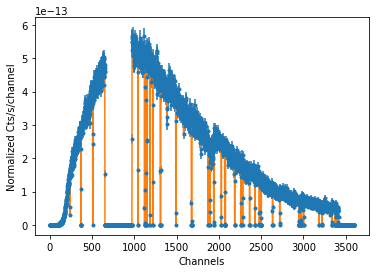

In [54]:
#plotting
xspec.Plot.xAxis = 'channel'
xspec.Plot.setRebin(minSig=0, maxBins=1)
xspec.Plot("data")
plt.xlabel('Channels')
plt.ylabel('Normalized Cts/s/channel')
#plt.xlim(8,33)
#plt.ylim(3e-12,3e-11)
#plt.ylim(1e-15,1e-12)
#plt.plot(xspec.Plot.x(1), xspec.Plot.y(1), '.')
#plt.plot(xspec.Plot.x(1), xspec.Plot.model())
plt.errorbar(np.array(xspec.Plot.x(1)), np.array(xspec.Plot.y(1))*1.6e-9,yerr=np.array(xspec.Plot.yErr(1))*1.6e-9,fmt='.')
#plt.errorbar(12.398/np.array(xspec.Plot.x(2)), np.array(xspec.Plot.y(2))*1.6e-9,yerr=np.array(xspec.Plot.yErr(2))*1.6e-9,fmt='.')
plt.plot(np.array(xspec.Plot.x(1)), np.array(xspec.Plot.model())*1.6e-9)
#plt.yscale('log')
#plt.xscale('log')
#plt.xlim(5450,5800)

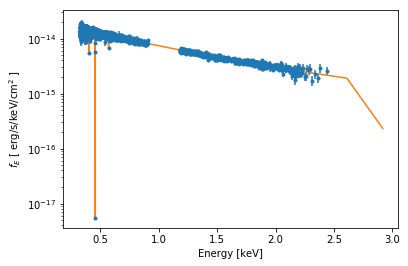

In [55]:
#plotting
xspec.Plot.xAxis = 'angstrom'
xspec.Plot.setRebin(minSig=5, maxBins=50)
xspec.Plot("eufspec")
plt.xlabel('Energy [keV]')
plt.ylabel('$f_E$ [ erg/s/keV/cm$^2$ ]')
#plt.xlim(8,33)
#plt.ylim(5e-12,2e-11)
#plt.plot(xspec.Plot.x(1), xspec.Plot.y(1), '.')
#plt.plot(xspec.Plot.x(1), xspec.Plot.model())
plt.errorbar( 12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.y(1))*1.6e-9,yerr=np.array(xspec.Plot.yErr(1))*1.6e-9,fmt='.')
#plt.errorbar(12.398/np.array(xspec.Plot.x(2)), np.array(xspec.Plot.y(2))*1.6e-9,yerr=np.array(xspec.Plot.yErr(2))*1.6e-9,fmt='.')
plt.plot(12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.model())*1.6e-9)
plt.yscale('log')

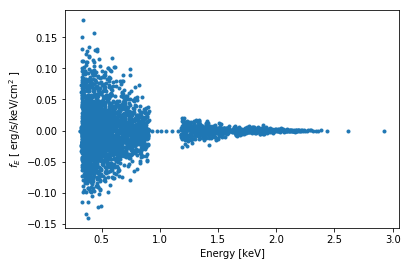

In [56]:
xspec.Plot.xAxis = 'keV'
xspec.Plot.setRebin(minSig=5, maxBins=50)
xspec.Plot("residual")
plt.xlabel('Energy [keV]')
plt.ylabel('$f_E$ [ erg/s/keV/cm$^2$ ]')
#plt.xlim(8,33)
#plt.ylim(5e-12,2e-11)
plt.plot(xspec.Plot.x(1), xspec.Plot.y(1), '.')
#plt.plot(xspec.Plot.x(2), xspec.Plot.y(2), '.')
#plt.plot(xspec.Plot.x(1), xspec.Plot.model())
#plt.errorbar( 12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.y(1))*1.6e-9,yerr=np.array(xspec.Plot.yErr(1))*1.6e-9,fmt='.')
#plt.plot(12.398/np.array(xspec.Plot.x(1)), np.array(xspec.Plot.model())*1.6e-9)
#plt.xscale('log')

In [57]:
xspec.AllData.clear() 
xspec.AllModels.clear()
m1 = xspec.Model("bbody*gabs")
m1.setPars(1.0, 2.0, 4, 1e-2, 1e-2)

In [58]:
xspec.AllData.clear() 
xspec.AllModels.clear()
#purple
#fs=xspec.FakeitSettings(response='colibri20190313.rmf', arf='colibrionaxis20190313.arf',exposure='10',fileName='test_pyxspec.pha')
#red
fs=xspec.FakeitSettings(response='colibri20190213.rmf', arf='colibrionaxis20190111.arf',exposure='10',fileName='test_pyxspec.pha') 
#black
#fs=xspec.FakeitSettings(response='colibri20190123.rmf', arf='colibrionaxis20190111.arf',exposure='10',fileName='test_pyxspec.pha')

xspec.AllData.fakeit(1, fs)

Exception: Fakeit error

In [96]:
xspec.Fit.statMethod = 'cstat'
# xspec.Fit.statMethod = 'chi2'
xspec.Fit.perform()

Exception: Error executing command: fit

In [0]:
xspec.Plot.xAxis = 'keV'
# rebin to SNR=6
xspec.Plot.setRebin(minSig=6, maxBins=100)
xspec.Plot("data")
plt.xlabel('Energy [keV]')
plt.ylabel('Normalized Cts/s/keV')
plt.errorbar(xspec.Plot.x(1), xspec.Plot.y(1),yerr=xspec.Plot.yErr(1),xerr=xspec.Plot.xErr(1),fmt='.')
plt.plot(xspec.Plot.x(1), xspec.Plot.model())
plt.xlim(3.97,4.03)
plt.ylim(0,20000)

In [0]:
#Photon rate for Athena
s=xspec.Spectrum('xifu_pyxspec.pha')
cnts = s.rate[0]
print(cnts)

#with fits.open('xifu_pyxspec.pha') as hdul:
#    hdul.info()
#    print(np.sum(hdul['SPECTRUM'].data['COUNTS'])/hdul['SPECTRUM'].header['EXPOSURE'])

#Photon rate for XXM
r1 = xspec.Spectrum('rgs1_pyxspec.pha')
cnts1 = r1.rate[0]
print(cnts1)

r2 = xspec.Spectrum('rgs2_pyxspec.pha')
cnts2 = r2.rate[0]
print(cnts2)

